In [50]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    plt.legend(loc='upper left')
    plt.show()

**Exercize 1 Data Prepatation and Choosing a Classifier**

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print("Class distribution:", np.bincount(y_train))

Class distribution: [35 35 35]


**Data size**
Witth small dataset, simple models like Logistic regression often work better because complex models like Neural Netwoks may overfit
With large datasets, more complex models (e.g., Random Forests, Deep Learning) can capture richer patterns and outperform simple models.

**Noise in data**
If the dataset has a lot of noise or mislabaled examples, simple models that generate (high bias, low variance) may perfrom better
Complex models with high flexibility  may overfit  the noise and perfrom worse

**Separability**
If the data is seprarable linearly separable , linear classifiers like Logisc Regression or Linear SVN are efficient and accurate.
Adn if the classes are nonelinear and overlapping, more powerful classifiers such as Decision Tress, Kernel SVM or Neural Netwoks may be required

Now doing for make_moons

In [52]:
from sklearn.datasets import make_moons

# Generate a non-linear dataset
X_moon, y_moon = make_moons(n_samples=200, noise=0.2, random_state=1)

# Split into train and test sets
X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(
    X_moon, y_moon, test_size=0.3, random_state=1, stratify=y_moon
)

# Standardize features
sc = StandardScaler()
sc.fit(X_train_moon)
X_train_moon_std = sc.transform(X_train_moon)
X_test_moon_std = sc.transform(X_test_moon)

# Combine train and test sets for visualization later
X_combined_moon_std = np.vstack((X_train_moon_std, X_test_moon_std))
y_combined_moon = np.hstack((y_train_moon, y_test_moon))

# Check distribution
print("Class distribution (train):", np.bincount(y_train_moon))
print("Class distribution (test):", np.bincount(y_test_moon))


Class distribution (train): [70 70]
Class distribution (test): [30 30]


**Exercize 2 Perceptron**

Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


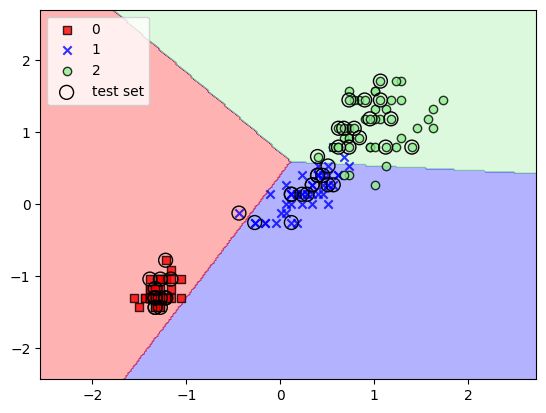

Text(0, 0.5, 'Petal width [standardized]')

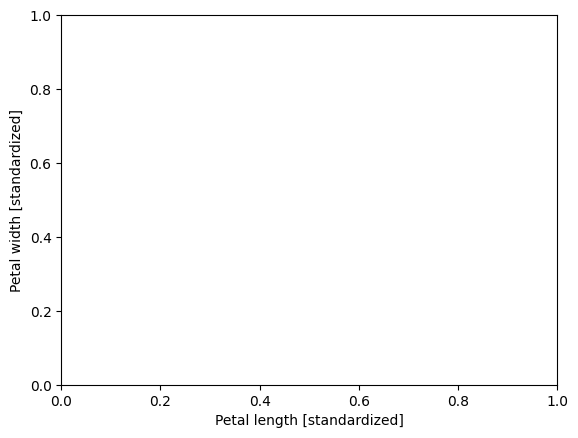

In [53]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

The convergence on the above is not really changing that much what is changing is the accuracy when we tune the learning rate

Accuracy: 0.8666666666666667


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


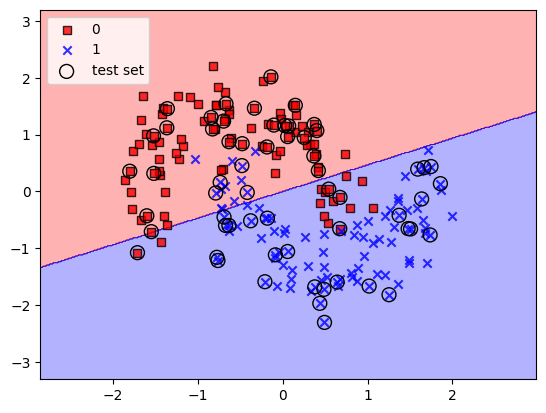

Text(0, 0.5, 'Petal width [standardized]')

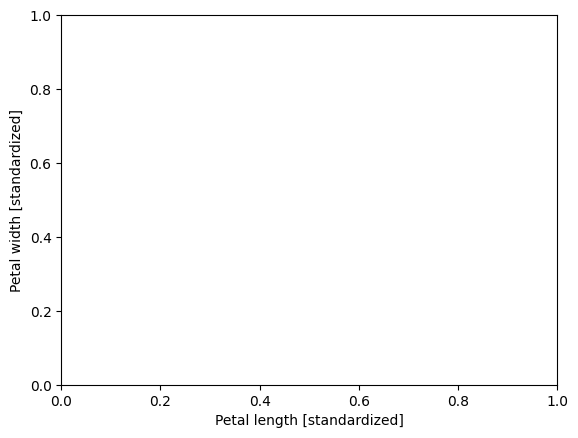

In [54]:
#Perceptron on the make_moons dataset
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_moon_std, y_train_moon)

y_pred_moon = ppn.predict(X_test_moon_std)
print('Accuracy:', accuracy_score(y_test_moon, y_pred_moon))

plot_decision_regions(X_combined_moon_std, y_combined_moon, classifier=ppn, test_idx=range(len(X_train_moon), len(X_combined_moon_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

it fails because the make_moons dataset is nonlinear

**Exercize 3: Logistic Regresssion**

Accuracy: 0.9777777777777777
Probabilities: [[4.35424381e-04 2.40133856e-01 7.59430720e-01]
 [7.98498914e-01 2.01272655e-01 2.28430822e-04]
 [8.15960440e-01 1.83929887e-01 1.09672897e-04]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


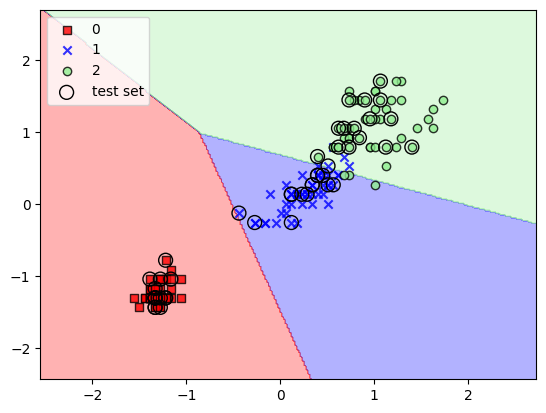

Text(0, 0.5, 'Petal width [standardized]')

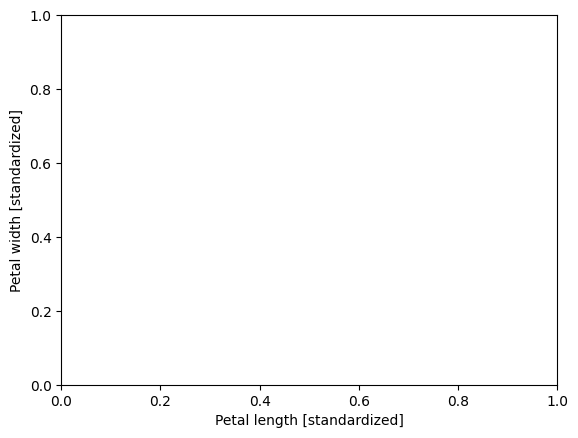

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Probabilities:', lr.predict_proba(X_test_std[:3]))

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

overfitting is when the model is too complex and learns not just the real patterns but also the noise and random quirks in the training data. the model does great on training data but performs badly on new test data

Underfitting the model is too simple and doesnt learn the patterns in the data.

In [56]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Accuracy: 0.9666666666666667
Probabilities: [[0.0014452  0.9985548 ]
 [0.01556992 0.98443008]
 [0.99463095 0.00536905]]


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


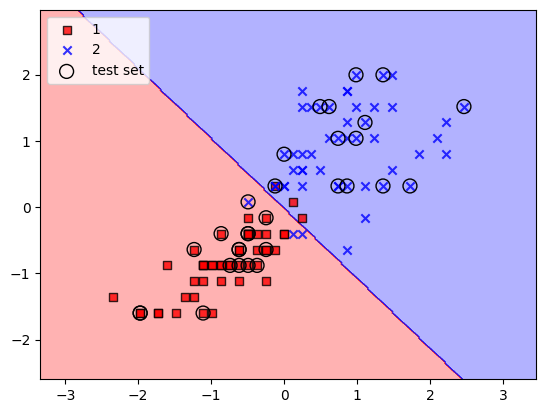

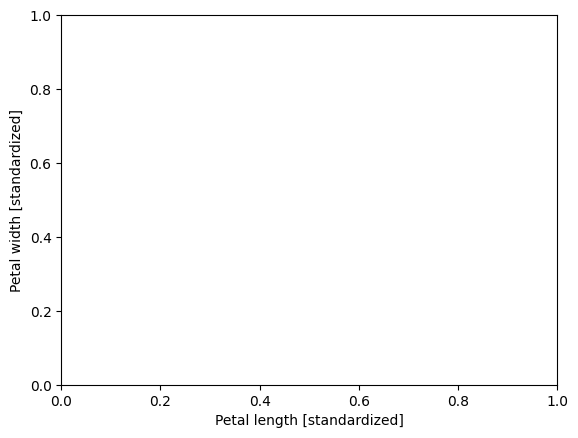

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- Make dataset binary ---
mask = (y == 1) | (y == 2)   # keep only versicolor & virginica
X_bin = X[mask]
y_bin = y[mask]

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_bin, y_bin, test_size=0.3, random_state=1, stratify=y_bin)

sc.fit(X_train_bin)
X_train_bin_std = sc.transform(X_train_bin)
X_test_bin_std = sc.transform(X_test_bin)

X_combined_bin_std = np.vstack((X_train_bin_std, X_test_bin_std))
y_combined_bin = np.hstack((y_train_bin, y_test_bin))

# --- sklearn Logistic Regression ---
lr = LogisticRegression(C=1, random_state=1, solver='lbfgs')
lr.fit(X_train_bin_std, y_train_bin)

y_pred = lr.predict(X_test_bin_std)
print('Accuracy:', accuracy_score(y_test_bin, y_pred))
print('Probabilities:', lr.predict_proba(X_test_bin_std[:3]))

# --- Plot ---
plot_decision_regions(X_combined_bin_std, y_combined_bin,
                      classifier=lr,
                      test_idx=range(len(X_train_bin), len(X_combined_bin_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()


**Exercise 4: Support Vector Machines (SVM)**

Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


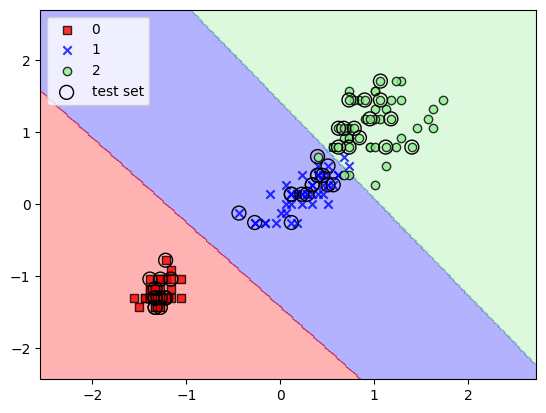

Text(0, 0.5, 'Petal width [standardized]')

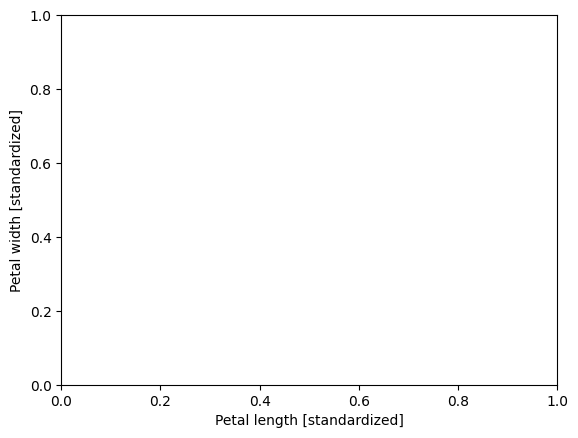

In [58]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=100, random_state=1)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

when tweaking the margin I dont see the margin change

So now lets try also plotting the support vectors

Accuracy: 0.9777777777777777
Support Vectors (coordinates):
[[-1.05383474 -1.04507821]
 [-1.16537974 -0.91397521]
 [-0.27301968 -0.2584602 ]
 [ 0.61934037  0.3970548 ]
 [ 0.61934037  0.3970548 ]
 [ 0.56356787  0.79036381]
 [ 0.73088538  0.5281578 ]
 [ 0.67511288  0.65926081]
 [ 0.56356787  0.79036381]
 [ 1.0097479   0.2659518 ]
 [ 0.56356787  0.79036381]
 [ 0.61934037  0.79036381]
 [ 0.73088538  0.3970548 ]
 [ 0.67511288  0.3970548 ]]
Indices of support vectors (in training set):
[43 77 10 45 59 69 79 99 20 27 34 40 42 81]
Number of support vectors for each class:
[2 6 6]


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


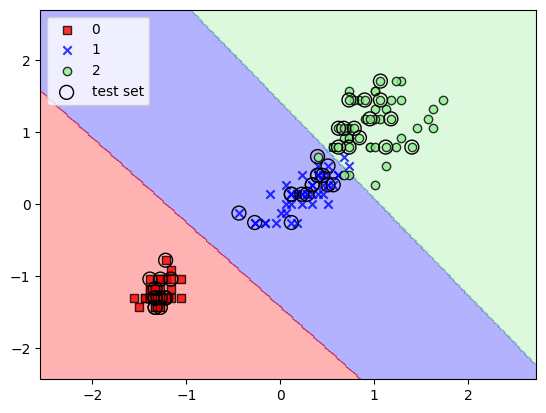

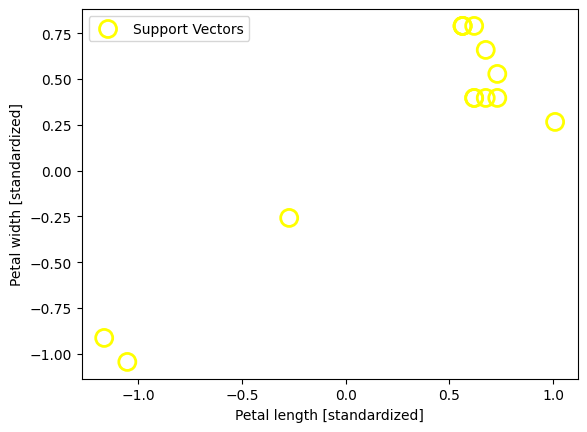

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train SVM
svm = SVC(kernel='linear', C=100, random_state=1)
svm.fit(X_train_std, y_train)

# Accuracy
y_pred = svm.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

# Support vectors
print("Support Vectors (coordinates):")
print(svm.support_vectors_)

print("Indices of support vectors (in training set):")
print(svm.support_)

print("Number of support vectors for each class:")
print(svm.n_support_)

# Plot with support vectors highlighted
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

# Highlight support vectors explicitly
plt.scatter(svm.support_vectors_[:, 0],
            svm.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='yellow',
            linewidth=2, label="Support Vectors")

plt.legend(loc='upper left')
plt.show()


**Exercise 5: Kernel SVM**

now doing the SVM with non linear

Accuracy: 0.8


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


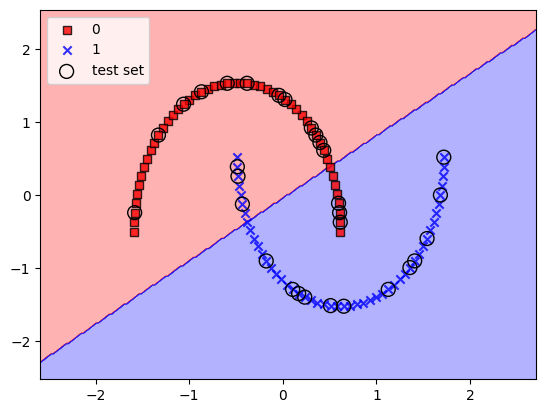

Text(0, 0.5, 'Feature 2 [standardized]')

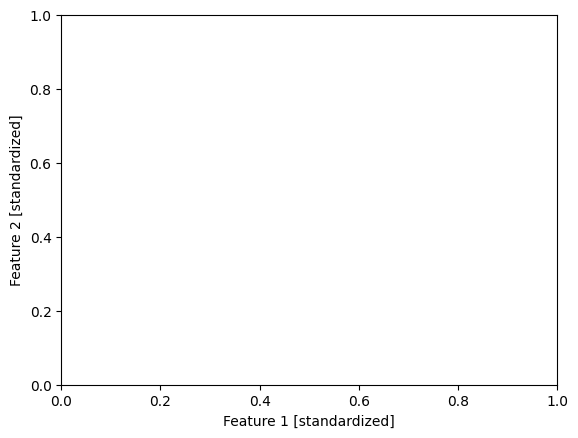

In [60]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=100, random_state=123)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)
X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.01, C=1.0)
svm_rbf.fit(X_train_m_std, y_train_m)

y_pred_m = svm_rbf.predict(X_test_m_std)
print('Accuracy:', accuracy_score(y_test_m, y_pred_m))

plot_decision_regions(X_combined_m_std, y_combined_m, classifier=svm_rbf, test_idx=range(len(X_train_m), len(X_combined_m_std)))
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')

by observation we can see its overfitting, it even draws the regions just around the data points which is overfitting. as we go up with the gamma we can see that

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Using the standardized Iris dataset you already have
# X_train_std, X_test_std, y_train, y_test, X_combined_std, y_combined

# Create SVM with RBF kernel
svm_rbf_iris = SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=1)
svm_rbf_iris.fit(X_train_std, y_train)

# Predictions
y_pred_rbf = svm_rbf_iris.predict(X_test_std)
print('Accuracy (RBF SVM):', accuracy_score(y_test, y_pred_rbf))


Accuracy (RBF SVM): 0.9777777777777777


Accuracy (RBF SVM): 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


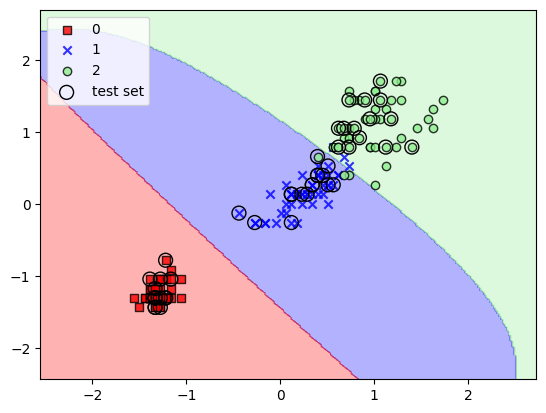

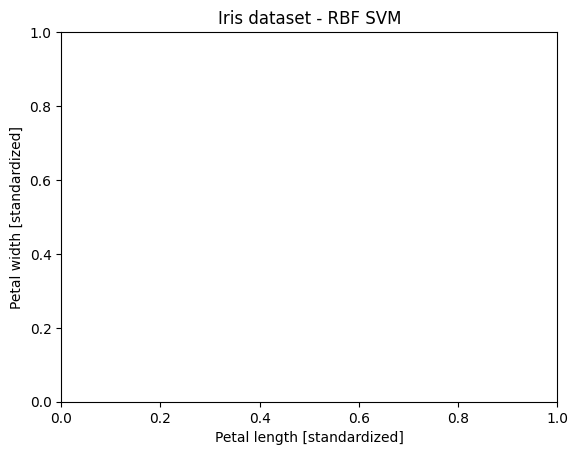

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare data
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length & width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Train RBF SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=1)
svm_rbf.fit(X_train_std, y_train)
y_pred = svm_rbf.predict(X_test_std)
print('Accuracy (RBF SVM):', accuracy_score(y_test, y_pred))

# Plot decision regions
plot_decision_regions(X_combined_std, y_combined, classifier=svm_rbf,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('Iris dataset - RBF SVM')
plt.show()


Accuracy (Linear SVM): 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


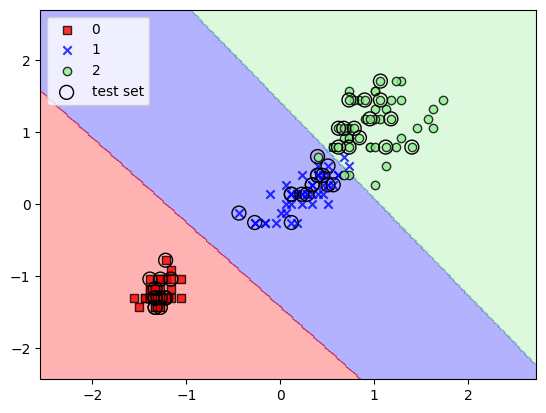

Accuracy (RBF SVM): 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


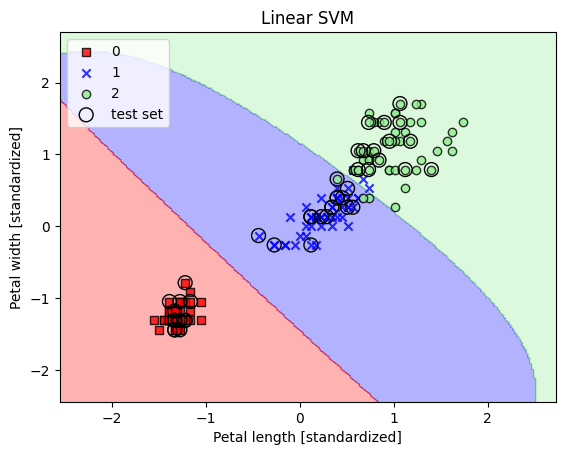

Text(0.5, 1.0, 'RBF SVM')

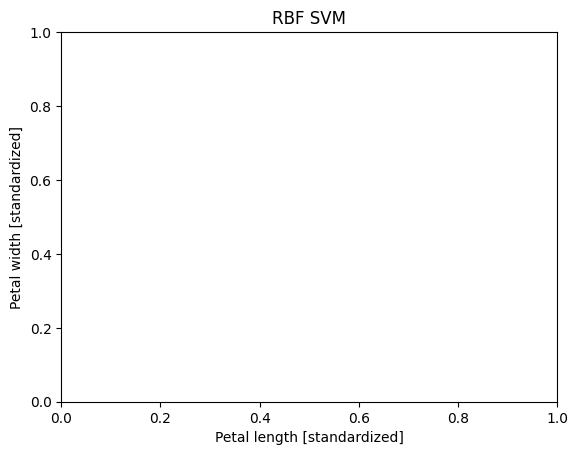

In [63]:


# --- Train Linear SVM ---
svm_linear = SVC(kernel='linear', C=100, random_state=1)
svm_linear.fit(X_train_std, y_train)
y_pred_linear = svm_linear.predict(X_test_std)
print("Accuracy (Linear SVM):", accuracy_score(y_test, y_pred_linear))

# --- Plot Linear SVM ---
plot_decision_regions(X_combined_std, y_combined, classifier=svm_linear,
                      test_idx=range(len(X_train_std), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('Linear SVM')

# --- Train RBF SVM ---
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=1)
svm_rbf.fit(X_train_std, y_train)
y_pred_rbf = svm_rbf.predict(X_test_std)
print("Accuracy (RBF SVM):", accuracy_score(y_test, y_pred_rbf))

# --- Plot RBF SVM ---
plot_decision_regions(X_combined_std, y_combined, classifier=svm_rbf,
                      test_idx=range(len(X_train_std), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('RBF SVM')


**Exercise 6: Decision Trees**

Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


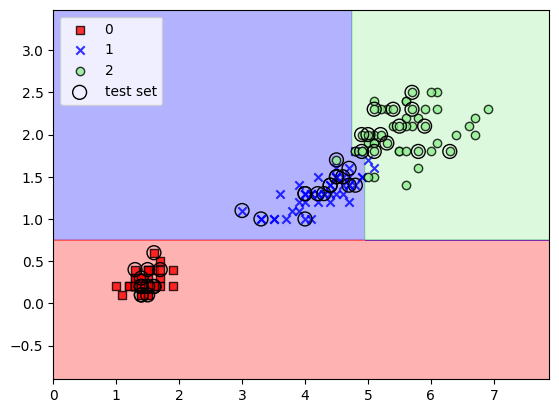

True

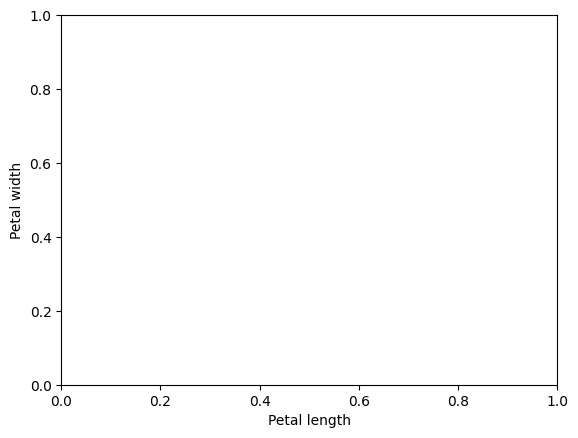

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)  # No scaling needed

y_pred = tree.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

X_combined = np.vstack((X_train, X_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')

dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'],
                          feature_names=['petal length', 'petal width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

Accuracy (Random Forest on test set): 0.9777777777777777
OOB Score: 0.9428571428571428


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


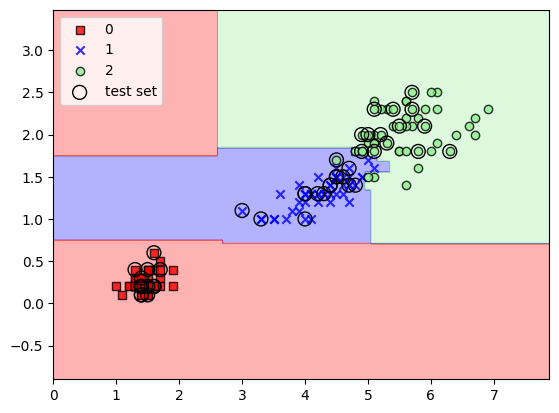

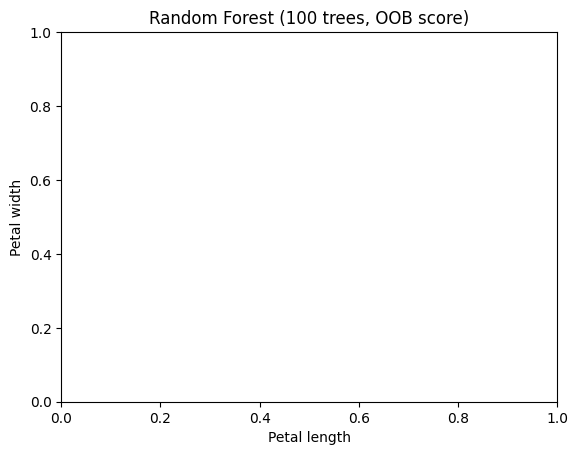

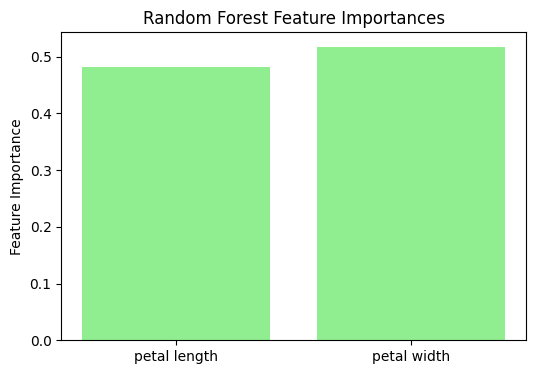

Feature importances: [0.48273366 0.51726634]


In [66]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Random Forest with 100 trees and OOB score ---
forest = RandomForestClassifier(criterion='gini', n_estimators=100,
                                oob_score=True, random_state=1)
forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = forest.predict(X_test)
print('Accuracy (Random Forest on test set):', accuracy_score(y_test, y_pred_rf))
print('OOB Score:', forest.oob_score_)

# Plot decision regions
X_combined = np.vstack((X_train, X_test))
plot_decision_regions(X_combined, y_combined, classifier=forest,
                      test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Random Forest (100 trees, OOB score)')

# --- Feature importances ---
importances = forest.feature_importances_
features = ['petal length', 'petal width']

plt.figure(figsize=(6,4))
plt.bar(features, importances, color='lightgreen')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

print("Feature importances:", importances)


**Exercise 8: K-Nearest Neighbors (KNN)**

Accuracy: 1.0


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


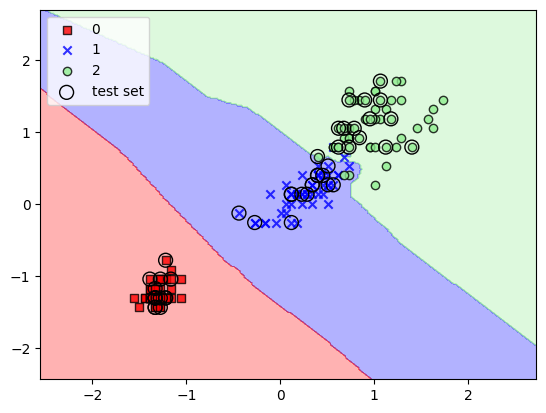

Text(0, 0.5, 'Petal width [standardized]')

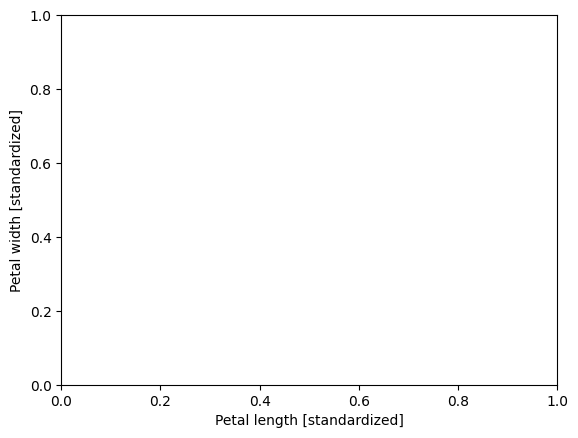

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')